In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import librosa

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data_music = [None] * 4

data_music[0], sr = librosa.load('./Data/genres_original/classical/classical.00000.wav')
data_music[1], sr = librosa.load('./Data/genres_original/jazz/jazz.00000.wav')
data_music[2], sr = librosa.load('./Data/genres_original/metal/metal.00000.wav')
data_music[3], sr = librosa.load('./Data/genres_original/pop/pop.00000.wav')

In [3]:
color = ['green', 'pink', 'skyblue', 'red']
genre = ['Classical', 'Jazz', 'Metal', 'Pop']

### Waveform Visualization

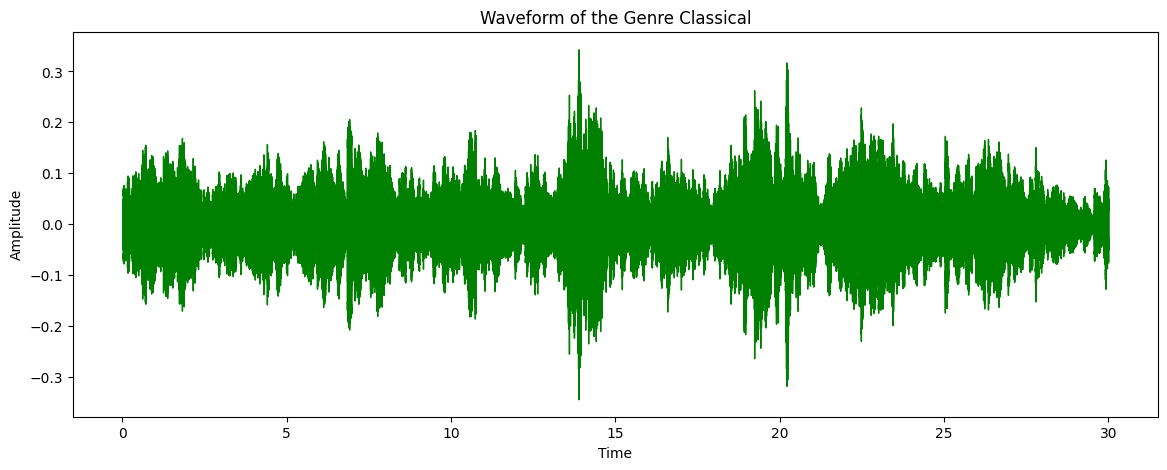

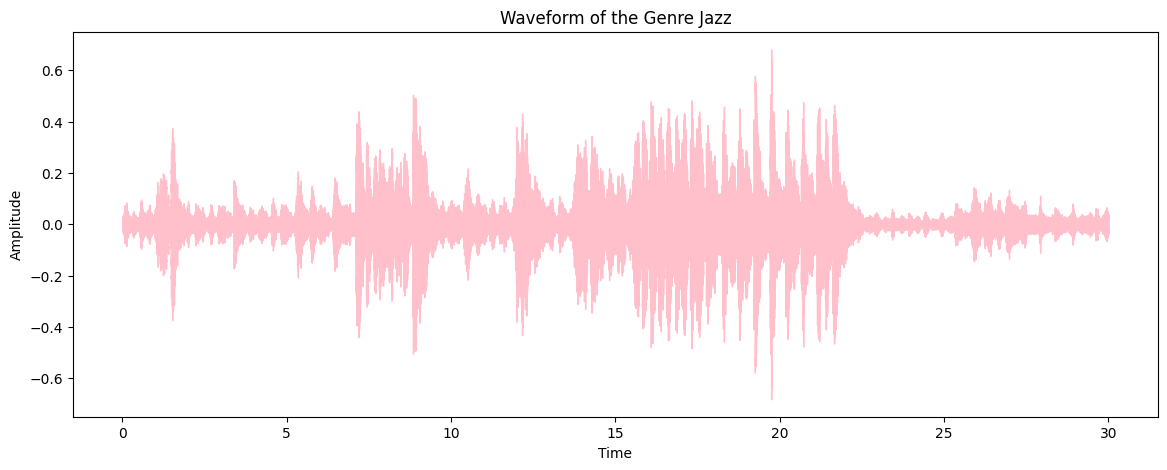

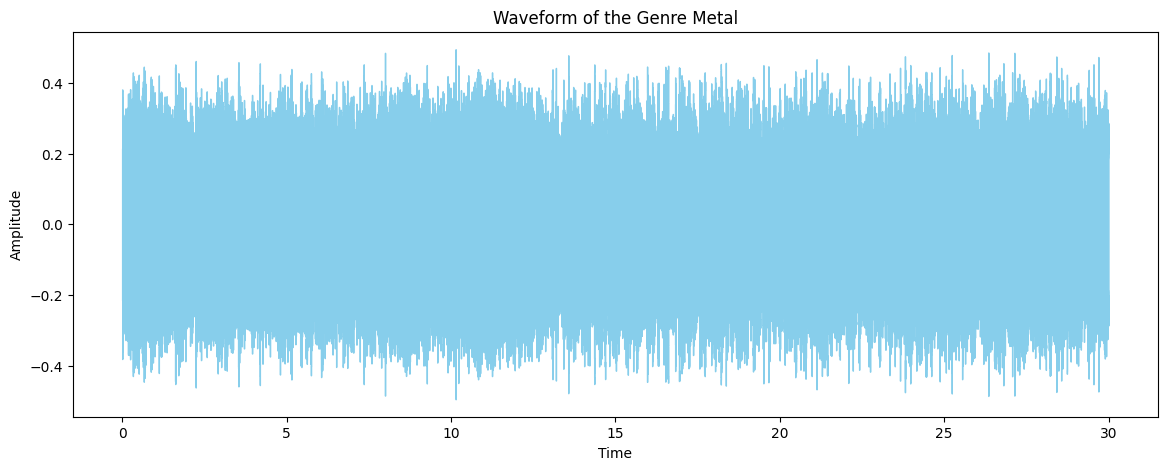

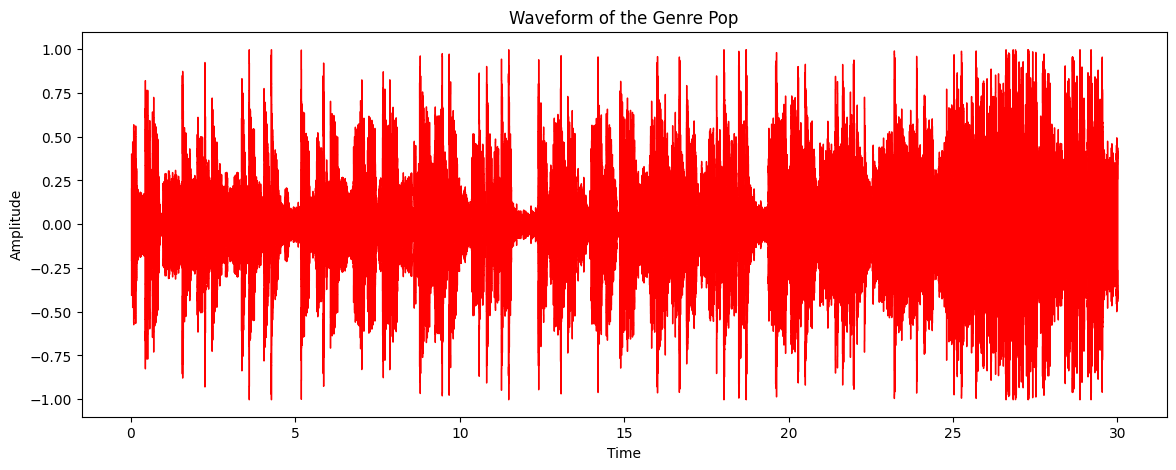

In [4]:
for i in range(0,len(data_music)) :
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(data_music[i], sr=sr, color=color[i])

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre[i]}')
    plt.show()

### Spectogram

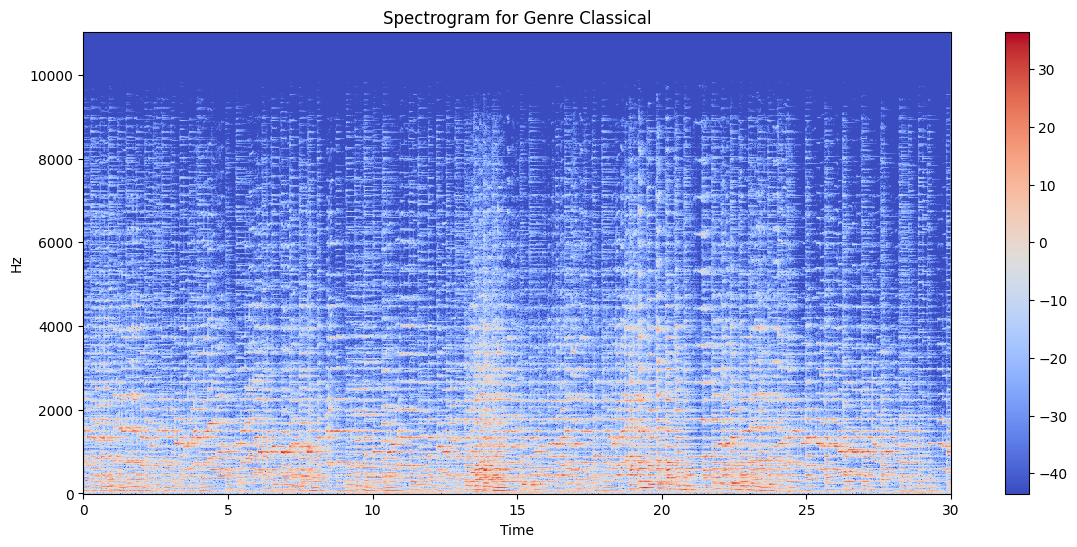

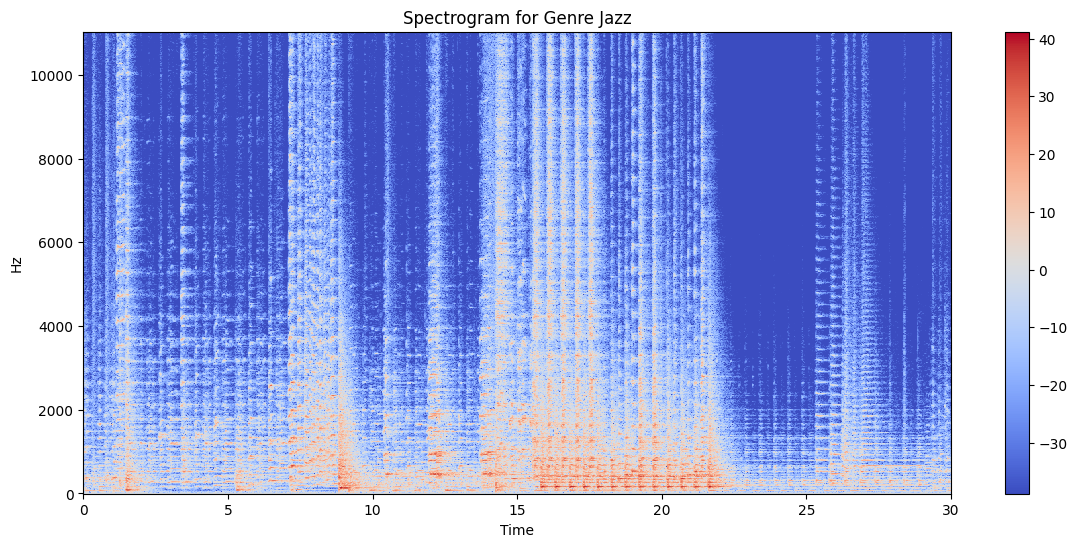

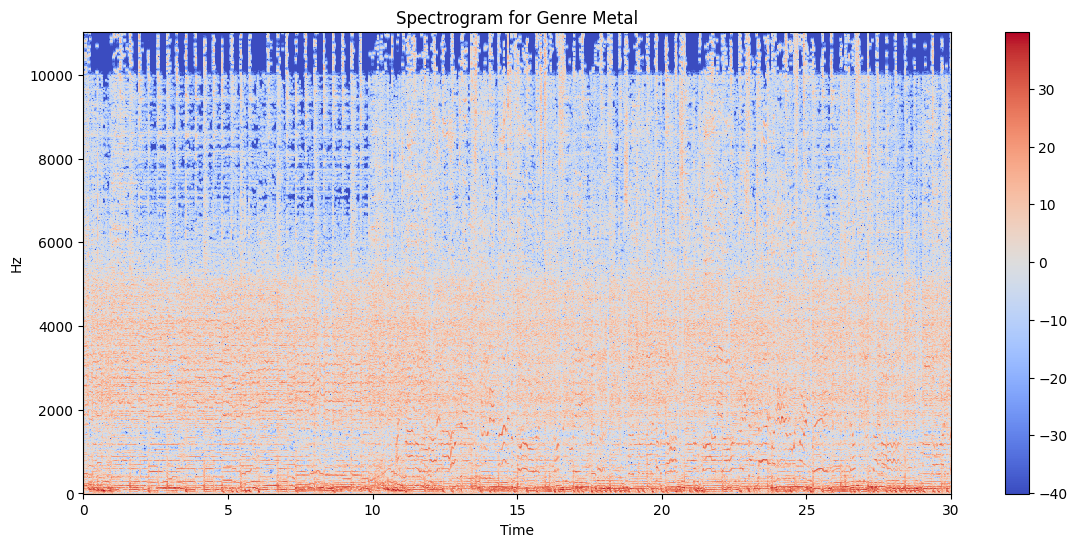

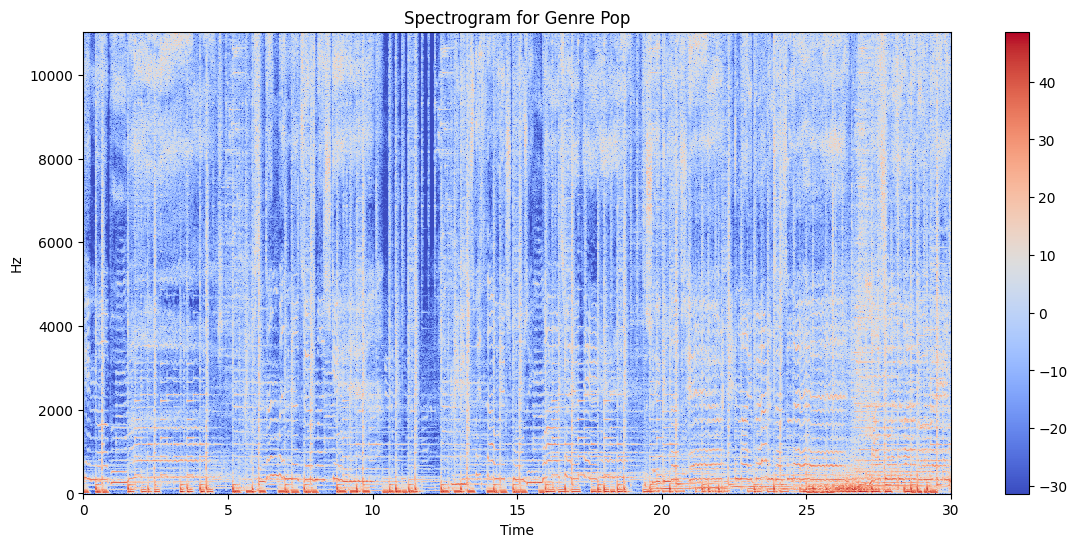

In [5]:
for i in range(0, len(data_music)) :
    stft = librosa.stft(data_music[i])
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize =(14, 6))
    librosa.display.specshow(stft_db, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.title(f'Spectrogram for Genre {genre[i]}')
    plt.colorbar()

### Spectral Rolloff

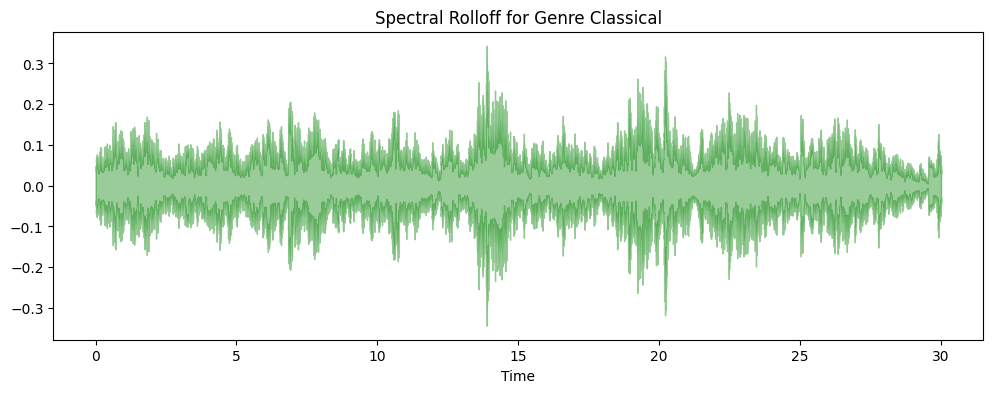

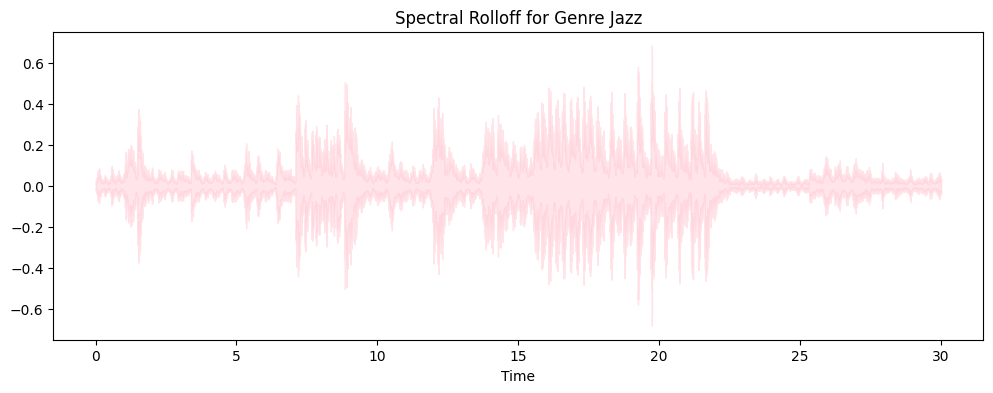

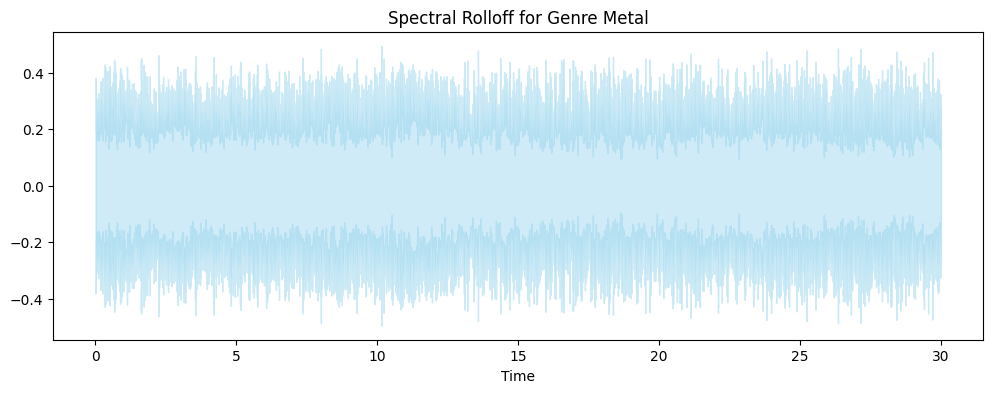

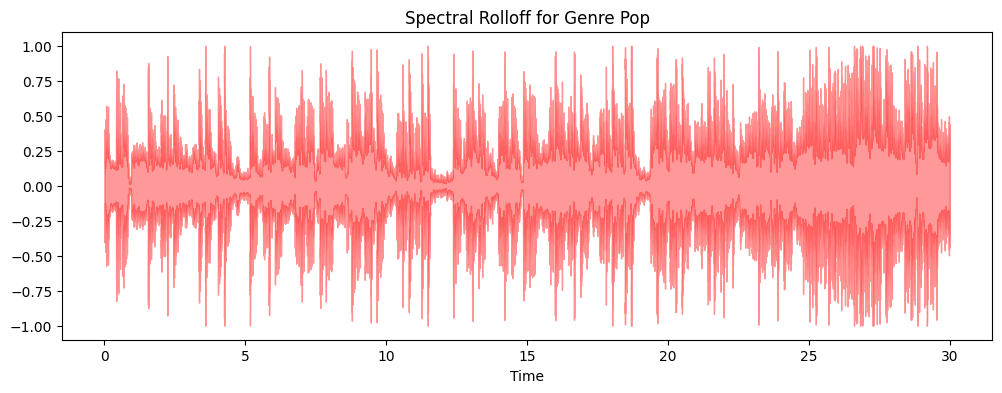

In [6]:
for i in range(0,len(data_music)) :
    spectral_rolloff = librosa.feature.spectral_rolloff(y = data_music[i], sr=sr)
    plt.figure(figsize = (12, 4))
    librosa.display.waveshow(data_music[i], sr=sr, alpha = 0.4, color=color[i])
    plt.title(f'Spectral Rolloff for Genre {genre[i]}')

### Chroma Feature

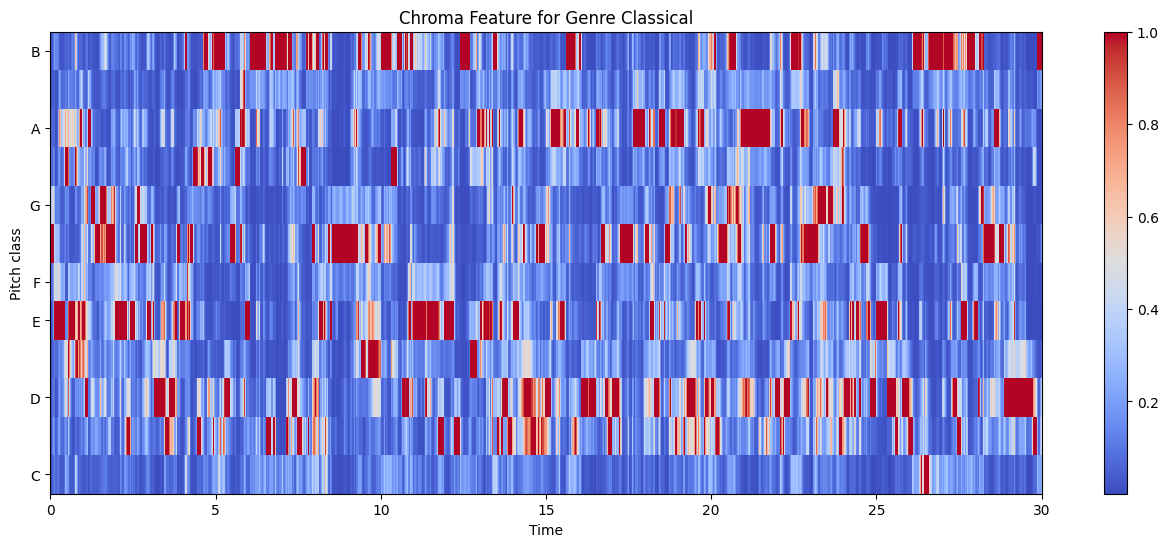

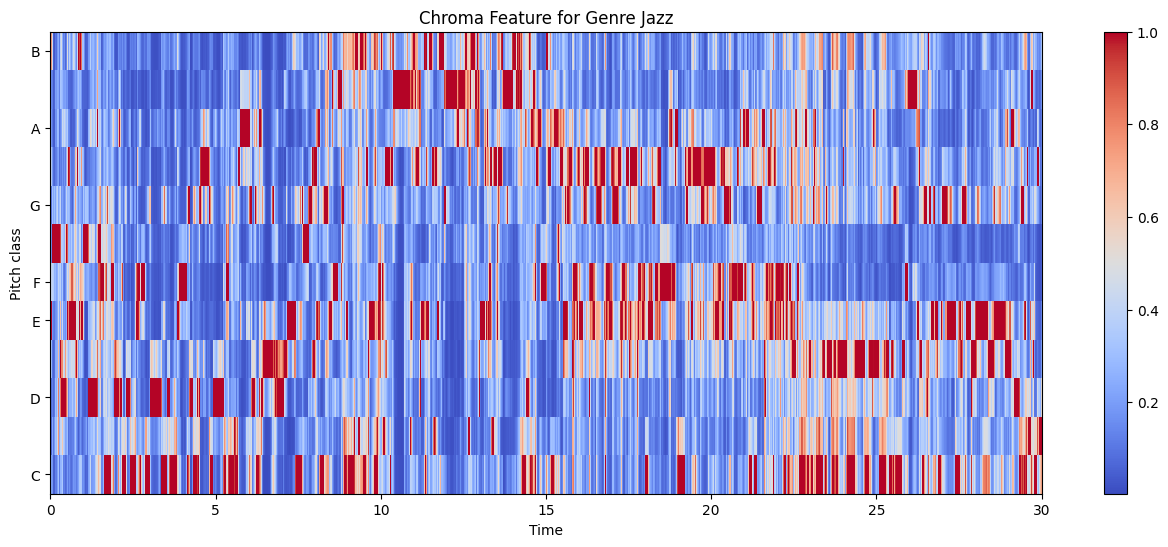

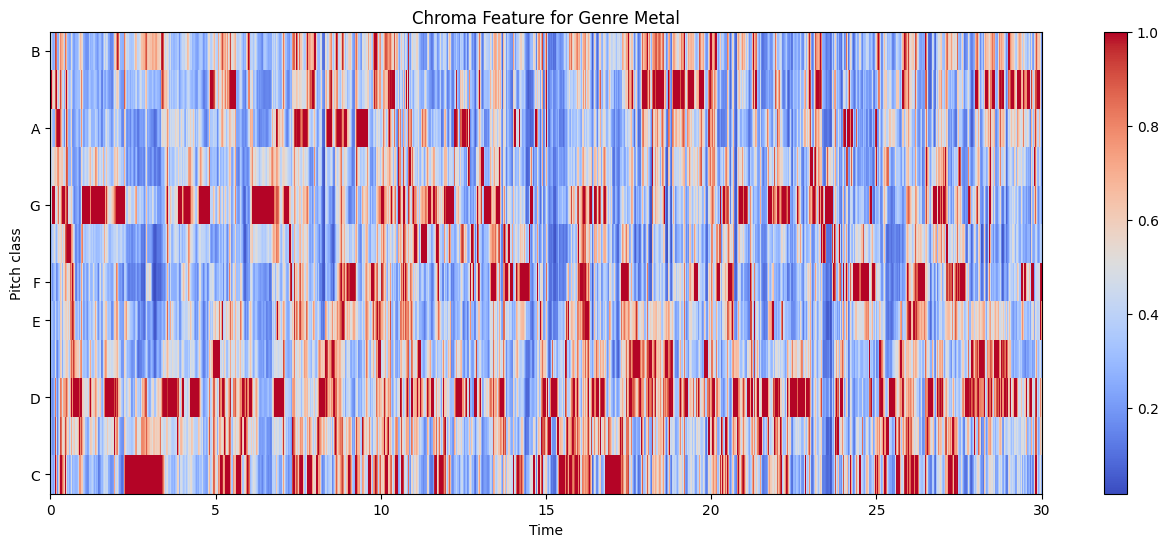

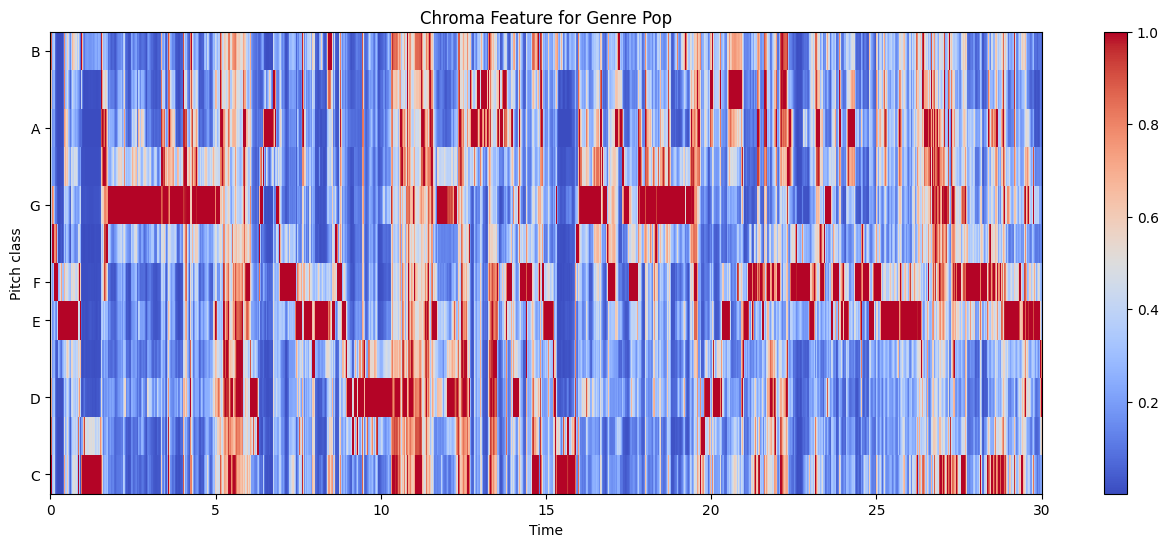

In [7]:
for i in range(0, len(data_music)) :
    chroma = librosa.feature.chroma_stft(y = data_music[i], sr = sr)
    plt.figure(figsize = (16,6))
    librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Chroma Feature for Genre {genre[i]}')
    plt.show()

### MFCC

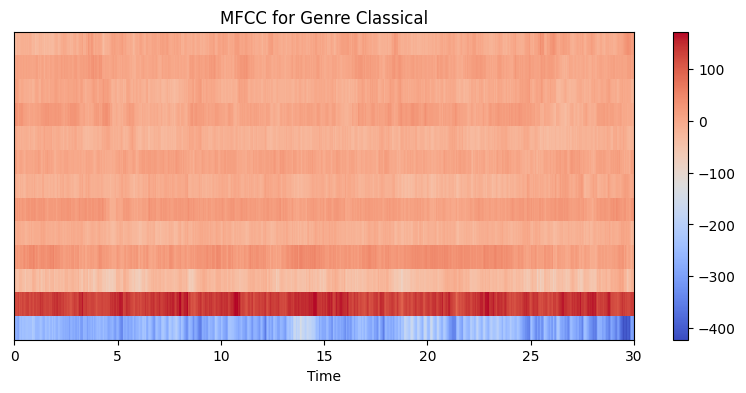

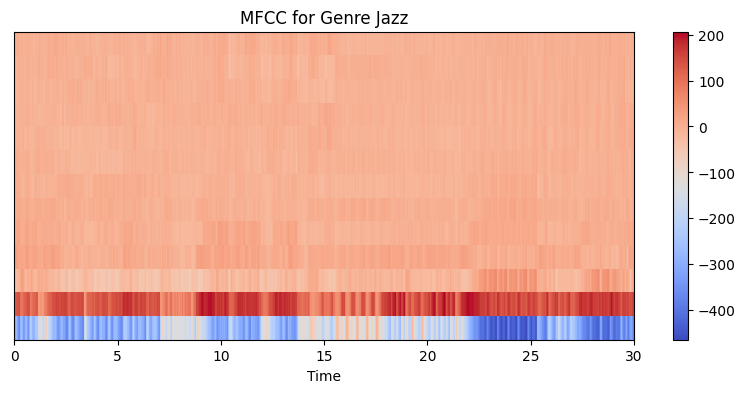

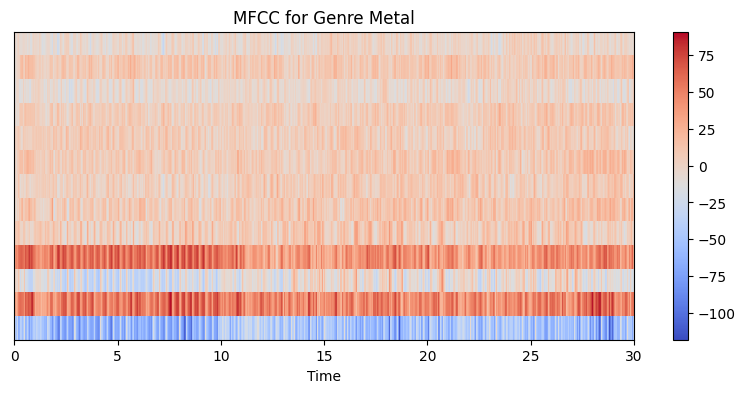

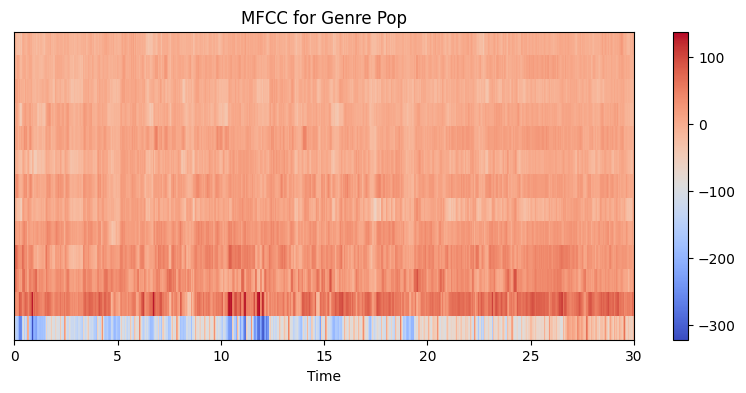

In [8]:
for i in range(0, len(data_music)) :
    mfccs = librosa.feature.mfcc(y=data_music[i], sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'MFCC for Genre {genre[i]}')
    plt.show()

### Zero Crossing Rate

The number of zero-crossing is :  27


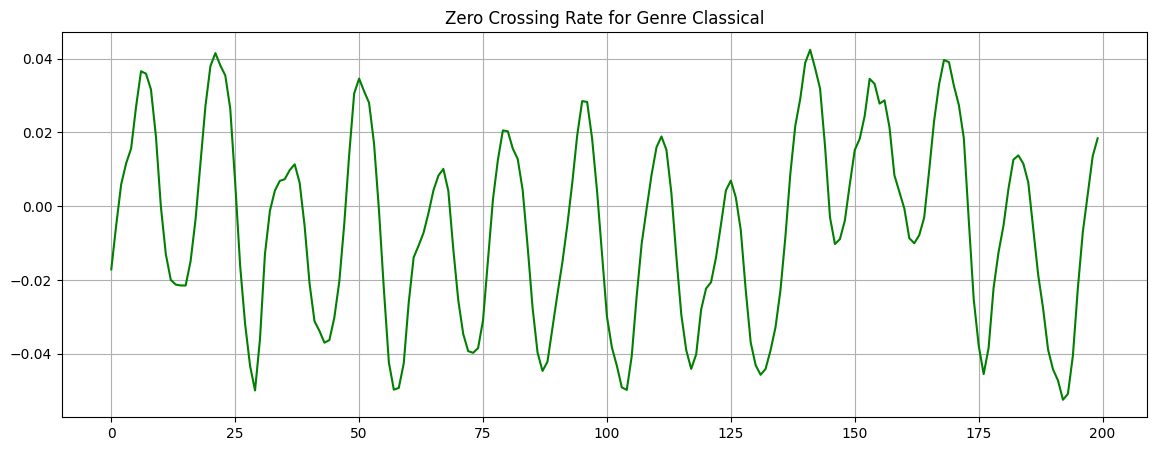

The number of zero-crossing is :  15


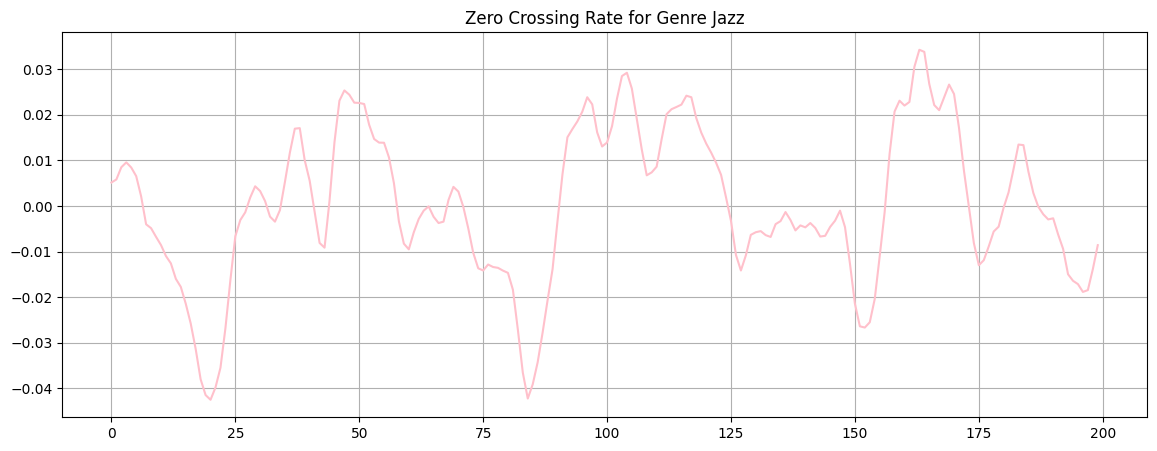

The number of zero-crossing is :  47


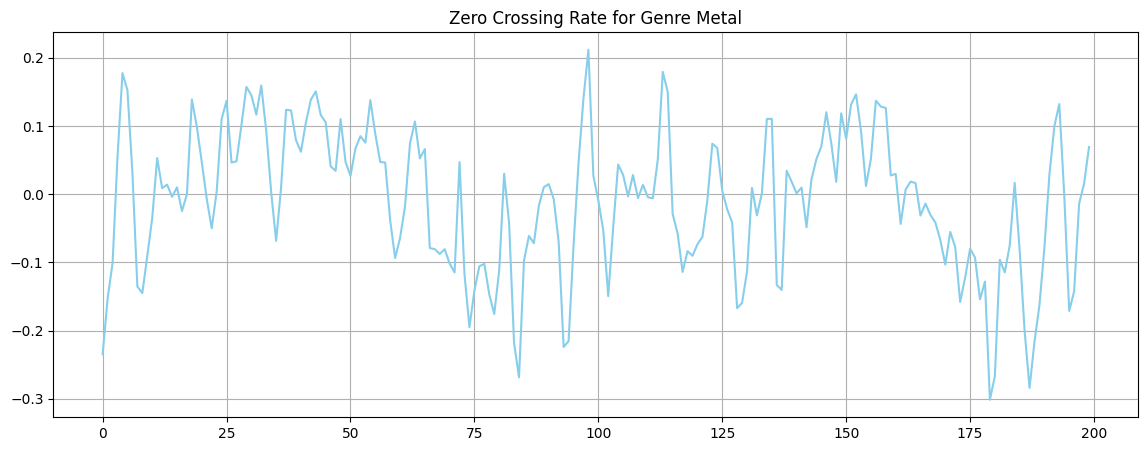

The number of zero-crossing is :  7


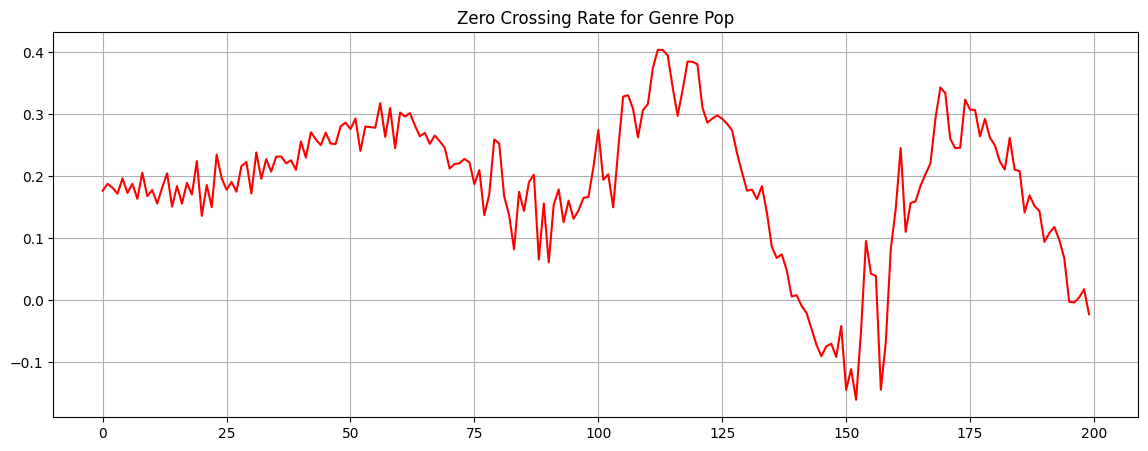

In [9]:
start = 1000
end = 1200
for i in range(0, len(data_music)) :
    plt.figure(figsize=(14,5))
    plt.plot(data_music[i][start:end], color=color[i])
    plt.title(f'Zero Crossing Rate for Genre {genre[i]}')
    plt.grid()

    zero_cross_rate = librosa.zero_crossings(data_music[i][start:end], pad=False)
    print("The number of zero-crossing is : ", sum(zero_cross_rate))
    plt.show()

### Data

In [10]:
music_data = pd.read_csv('./Data/features_3_sec.csv')
# music_data = pd.read_csv('./Data/features_30_sec.csv')

# music_data = music_data[music_data['label'].isin(list(map(lambda x: x.lower(),genre)))]
music_data = music_data.drop(music_data[~music_data['label'].isin(list(map(lambda x: x.lower(),genre)))].index)
music_data = music_data.drop(['filename','length'], axis=1)
music_data = music_data.drop_duplicates()
music_data = music_data.reset_index(drop=True)

print(music_data['label'].value_counts())

# music_data.head()
music_data.groupby(['label']).head(2)

label
jazz         1000
classical     998
pop           980
metal         930
Name: count, dtype: int64


chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0             0.255331         0.080393  0.032510  0.000075   
1             0.231431         0.084894  0.031453  0.000059   
998           0.330994         0.079372  0.027391  0.000453   
999           0.261249         0.081571  0.023539  0.000141   
1998          0.469777         0.064969  0.114357  0.000313   
1999          0.475877         0.060349  0.108023  0.000252   
2928          0.292898         0.087976  0.152155  0.003659   
2929          0.431961         0.098023  0.144793  0.007760   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1599.272683           1.856708e+04              1675.591596   
1                1551.352817           2.852497e+04              1485.790068   
998              1881.828203           5.857734e+05              2092.319364   
999              1537.666808           2.267437e+05              1664.019529   
1998             3239.527402           2.169865e+05              2593.686284   
1999             3099.116771           1.520604e+05              2441.076252   
2928             3631.020933           9.013656e+05              3697.202026   
2929             3793.287537           1.061960e+06              3523.579122   

      spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_var  \
0               20596.851729   2928.515625  1.480651e+05  ...   55.257095   
1               28831.794511   2623.655161  1.586603e+05  ...   50.988071   
998            292619.613874   3734.023062  3.117576e+06  ...   18.742546   
999            111661.865618   2727.925556  1.084181e+06  ...   25.649015   
1998           116871.372149   6072.280461  1.406993e+06  ...   39.522312   
1999           151689.561899   5630.766977  1.432090e+06  ...   42.429794   
2928           121601.141556   8715.563965  2.386158e+06  ...  133.493866   
2929            86395.620894   8502.799354  1.276981e+06  ...   88.343239   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -1.666343  104.916260     4.525014   69.806412    -0.897889   
1       -1.546098   65.954590     7.157280   69.336983     2.718532   
998     -1.921320   35.105392     3.570771   44.833961     4.775205   
999     -4.231021   22.553967     2.258785   24.966520     1.145652   
1998    -3.758081   46.328308     6.084676   36.427223    -3.505747   
1999    -5.269487   49.039299     5.555891   37.928406    -6.140120   
2928     4.099293  109.156982     4.791268  199.414246    12.656324   
2929     4.242457   64.983543    12.871586   87.960342    12.184389   

      mfcc19_var  mfcc20_mean  mfcc20_var      label  
0     110.099174     4.160629  194.109070  classical  
1     120.725609    -1.692275  150.527496  classical  
998    43.541439     3.288585   53.712883       jazz  
999    18.952309    -2.832868   62.279236       jazz  
1998   25.076586    -0.384954   39.001846      metal  
1999   51.275692     0.870400   36.103729      metal  
2928  152.055344     3.534023  128.337646        pop  
2929  118.832283    -3.045620   54.466854        pop  

[8 rows x 58 columns]

In [11]:
# Transforming Features
class_list = music_data.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)

/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [12]:
# Scaling of Features
fit = StandardScaler()
X = fit.fit_transform(np.array(music_data.iloc[:, :-1], dtype = float))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

### KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 95.91%


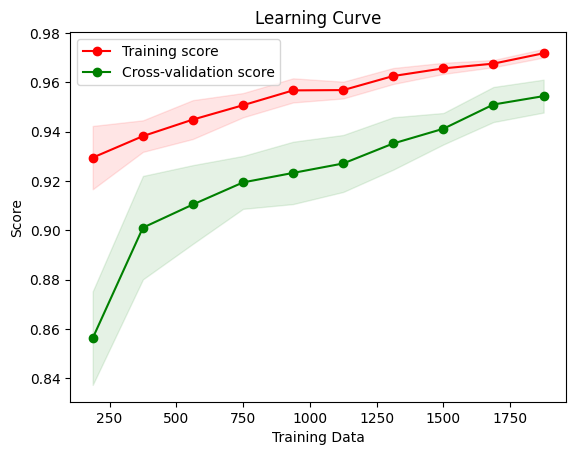

In [15]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Data")
plt.ylabel("Score")

plt.grid()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [16]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'cosine']}

In [17]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_

print(best_params)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [18]:
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 97.19%


In [19]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9718670076726342


### Logistic Regression

In [20]:
lr_classifier = LogisticRegression(random_state=42, max_iter=5000, solver='liblinear', C = 0.01)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

accuracy_lor = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lor * 100:.2f}%')

Accuracy: 92.71%


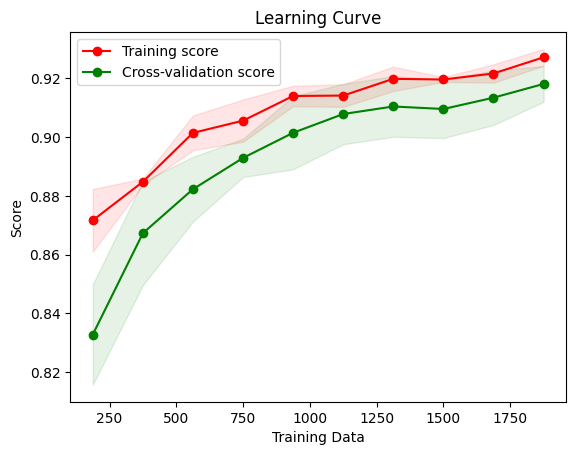

In [23]:
train_sizes, train_scores, test_scores = learning_curve(lr_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Data")
plt.ylabel("Score")

plt.grid()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [25]:
param_grid = {
     'solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'],  # Solver options
     'penalty': ['l1', 'l2'],  # Penalty options
     'C': [0.1, 1.0, 10.0],  # Regularization strengths
     'tol': [1e-3, 1e-4, 1e-5],  # Tolerance values
     'fit_intercept': [True, False],  # Fit intercept
     'warm_start': [False, True],  # Warm start
}

# grid_search = GridSearchCV(lr_classifier, param_grid, verbose = 2, cv=3, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

best_params = {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001, 'warm_start': False}

print(best_params)

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001, 'warm_start': False}


In [26]:
lr_classifier = LogisticRegression(random_state=42, max_iter=5000, solver=best_params['solver'], C = best_params['C'], penalty = best_params['penalty'], tol = best_params['tol'], fit_intercept = best_params['fit_intercept'], warm_start = best_params['warm_start'])
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

accuracy_lor = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lor * 100:.2f}%')

Accuracy: 95.65%


In [27]:
y_hat = lr_classifier.predict(X_train)
y_lor = lr_classifier.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_lor))

Training set accuracy:  0.9628839590443686
Test set accuracy:  0.9565217391304348


### Prediction

In [28]:
def calculate_features(filename):
    y, sr = librosa.load(filename)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    # Spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_var = np.var(spectral_centroid)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_var = np.var(spectral_bandwidth)

    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)
    rolloff_var = np.var(rolloff)

    # Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    # Harmonic-to-percussive ratio
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    harmony_var = np.var(harmonic)
    perceptr_mean = np.mean(percussive)
    perceptr_var = np.var(percussive)

    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_var = np.var(mfccs, axis=1)

    # Combine all the features into a single list
    features = [
        chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
        spectral_centroid_mean, spectral_centroid_var,
        spectral_bandwidth_mean, spectral_bandwidth_var,
        rolloff_mean, rolloff_var,
        zero_crossing_rate_mean, zero_crossing_rate_var,
        harmony_mean, harmony_var, perceptr_mean, perceptr_var,
        tempo
    ]

    for i in range(20):
        features.append(mfccs_mean[i])
        features.append(mfccs_var[i])

    return np.array(features)


In [29]:
# features = calculate_features('./Data/genres_original/metal/metal.00000.wav')
features = calculate_features('../ckpt2/output1.wav')

In [30]:
predict = knn.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[3]
['pop']


In [31]:
predict = lr_classifier.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[3]
['pop']


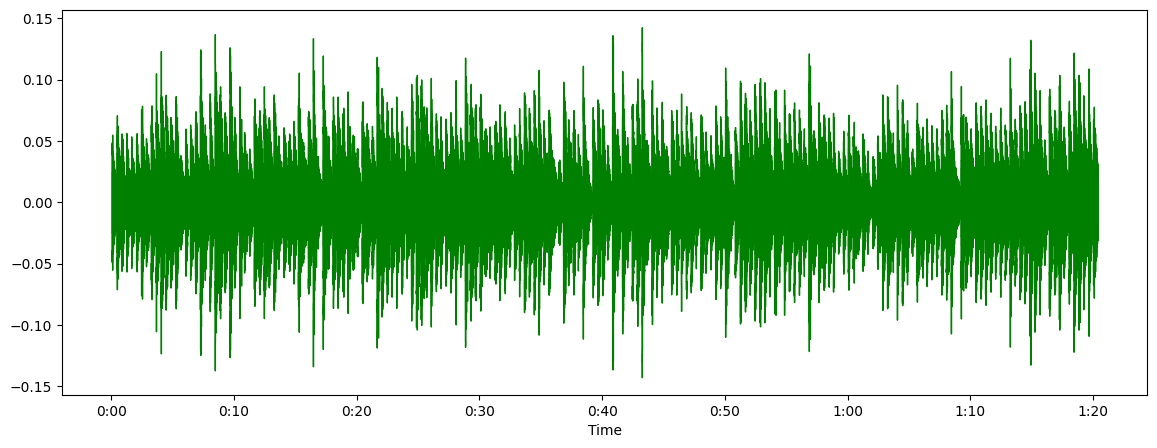

In [33]:
# Print waveform of the audio file

data_music, sr = librosa.load('../ckpt2/output1.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_music, sr=sr, color='green')
plt.show()